# Interesting insights



In [15]:
"""
    DATA EXPLORATION GOALS
        - how many samples are not classified and why
        - narrow down a df with samples where num_genr and num_dt are > 0
        - view realtionships in data where features are available
"""


import pandas as pd

In [3]:
# df = pd.read_csv('https://raw.githubusercontent.com/KyleCodes/blockprints/main/metadata_joined_master.csv')
df = pd.read_csv('joined_master.csv')

# fruits["favorite_fruits"] = fruits["favorite_fruits"].apply(eval)
df['genre_terms'] = df['genre_terms'].apply(eval)
df['desc_tags'] = df['desc_tags'].apply(eval)

df

,IMP_ID,filename,genre_terms,num_genres,desc_tags,num_desc_tags
0,1,20148-40.jpg,[],0,[],0
1,2,20982-10.jpg,[portrait],1,"[bird, unspecified, church, steeple, window, 1...",13
2,3,31714-10.jpg,[],0,"[1680-onward, late Stuart / Georgian, man, num...",3
3,4,30230-40.jpg,[portrait],1,"[fan, number of figures - 1, outdoor, 1603-162...",6
4,5,21213-10.jpg,[],0,[],0
...,...,...,...,...,...,...
16098,16108,36412-20.jpg,[],0,[],0
16099,16109,36413-10.jpg,[],0,[],0
16100,16110,36413-20.jpg,[],0,[],0
16101,16111,36414-10.jpg,[],0,[],0


# Off the bat, it appears there are about 10,000 incomplete samples. These are cases where either a sample lacked desc_tags or when it lacked genre terms. A sample was dropped if it contained desc tags, but not genre terms and vice versa




In [5]:
# Goal: see the overlap of missing samples
empty_genres = df[df['num_genres'] == 0]
empty_dts = df[df['num_desc_tags'] == 0]

In [6]:
intersection = []

for no_dt in empty_dts['IMP_ID']:
    if no_dt in empty_genres['IMP_ID']:
        intersection.append(no_dt)
        
print('=================================\nempty_genre_len len: ' + str(len(empty_genres)))
print('=================================\nempty_dt_len len: ' + str(len(empty_dts)))
print('=================================\nintersection len: ' + str(len(intersection)) + '\n=================================')

empty_genre_len len: 9932
empty_dt_len len: 9808
intersection len: 8184


In [7]:
df_enr = df[df['num_genres'] != 0]
df_enr = df_enr[df_enr['num_desc_tags'] != 0]

df_enr

,IMP_ID,filename,genre_terms,num_genres,desc_tags,num_desc_tags
1,2,20982-10.jpg,[portrait],1,"[bird, unspecified, church, steeple, window, 1...",13
3,4,30230-40.jpg,[portrait],1,"[fan, number of figures - 1, outdoor, 1603-162...",6
5,6,20112-40.jpg,[portrait],1,"[woman, number of figures - 1, 1200-1558, medi...",3
7,8,20663-20.jpg,[portrait],1,"[woman, number of figures - 1, 1558-1603, Eliz...",3
8,9,30270-30.jpg,[portrait],1,"[1603-1625, Jacobean, man, number of figures -...",6
...,...,...,...,...,...,...
11622,11632,30464-30.jpg,[portrait],1,"[outdoor, man, number of figures - 1, pope, pl...",6
11623,11633,30464-20.jpg,[portrait],1,"[man, number of figures - 1, 1558-1603, Elizab...",3
11624,11634,30464-10.jpg,[emblem / symbol],1,"[angel, number of figures - 2, period unknown,...",8
11625,11635,30462-20.jpg,[portrait],1,"[outdoor, king, man, number of figures - 1, 16...",8


In [8]:
len(df_enr)

6170

In [9]:
print('=================================\nSamples Dropped: ' + str(len(df) - len(df_enr)) + '\n=================================')

Samples Dropped: 9933


<AxesSubplot:>

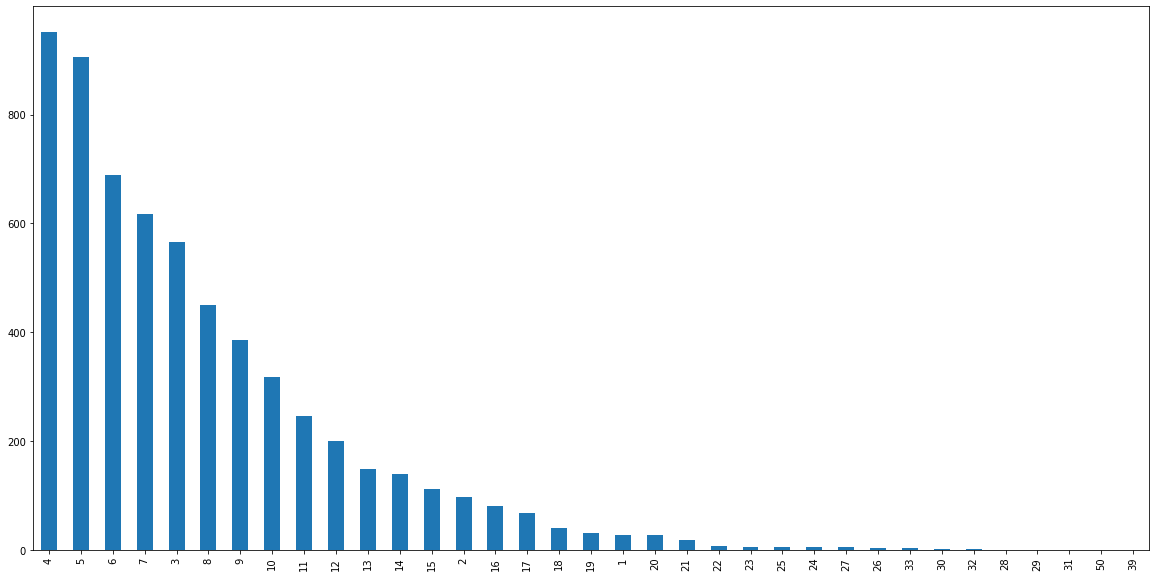

In [10]:
df_enr['num_desc_tags'].value_counts().sort_values(ascending = False).plot.bar(figsize = (20,10))

<AxesSubplot:>

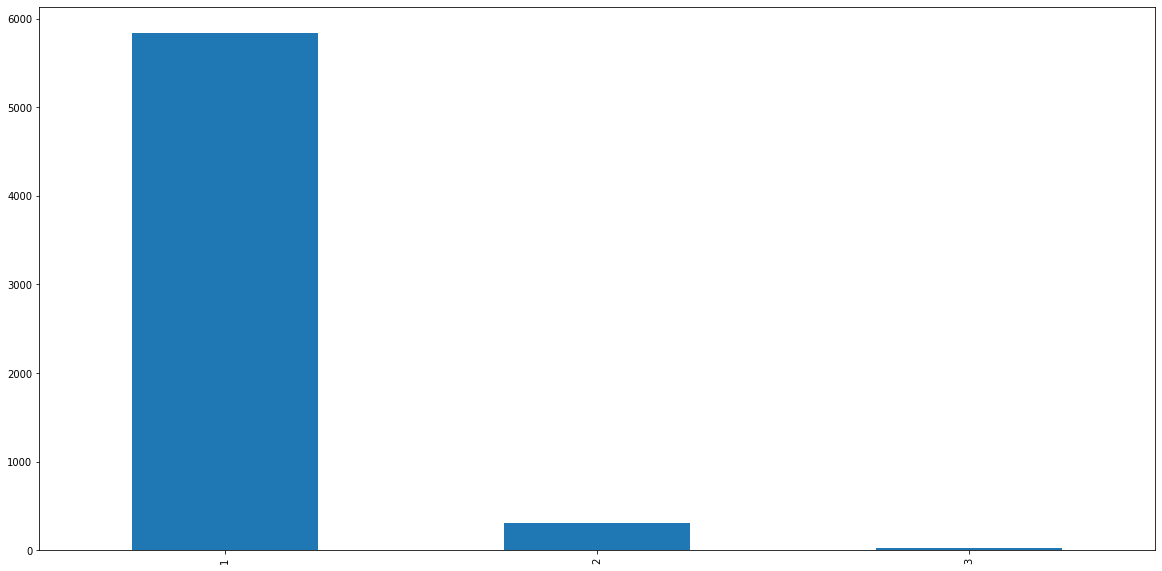

In [11]:
df_enr['num_genres'].value_counts().sort_values(ascending = False).plot.bar(figsize = (20,10))

# Most of the complete samples contain a small amount of descriptors / genres, while a few contain many. My initial intuition is that a majority of the images arent that visually complex, and thus lack labels. I hope to test this and report it 

<hr>

# Goal: see the most frequently used terms visualized by label

In [12]:
def to_1D(series):
    return pd.Series([x for _list in series for x in _list])

<AxesSubplot:>

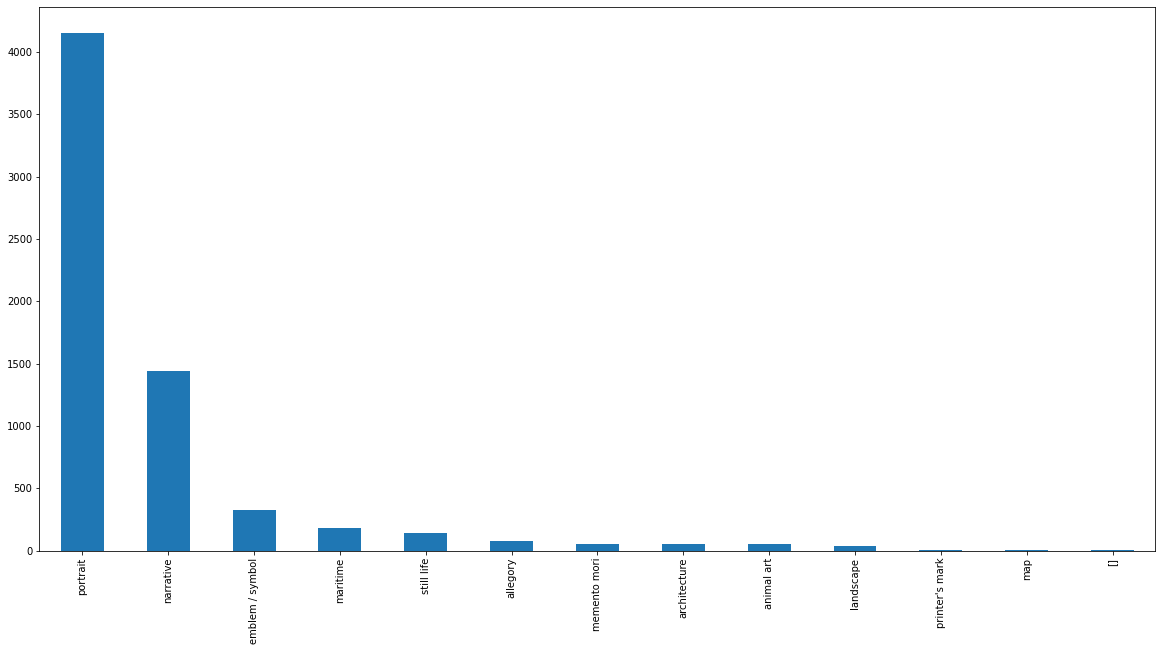

In [33]:
to_1D(df_enr['genre_terms']).value_counts().plot.bar(figsize = (20,10))

<AxesSubplot:>

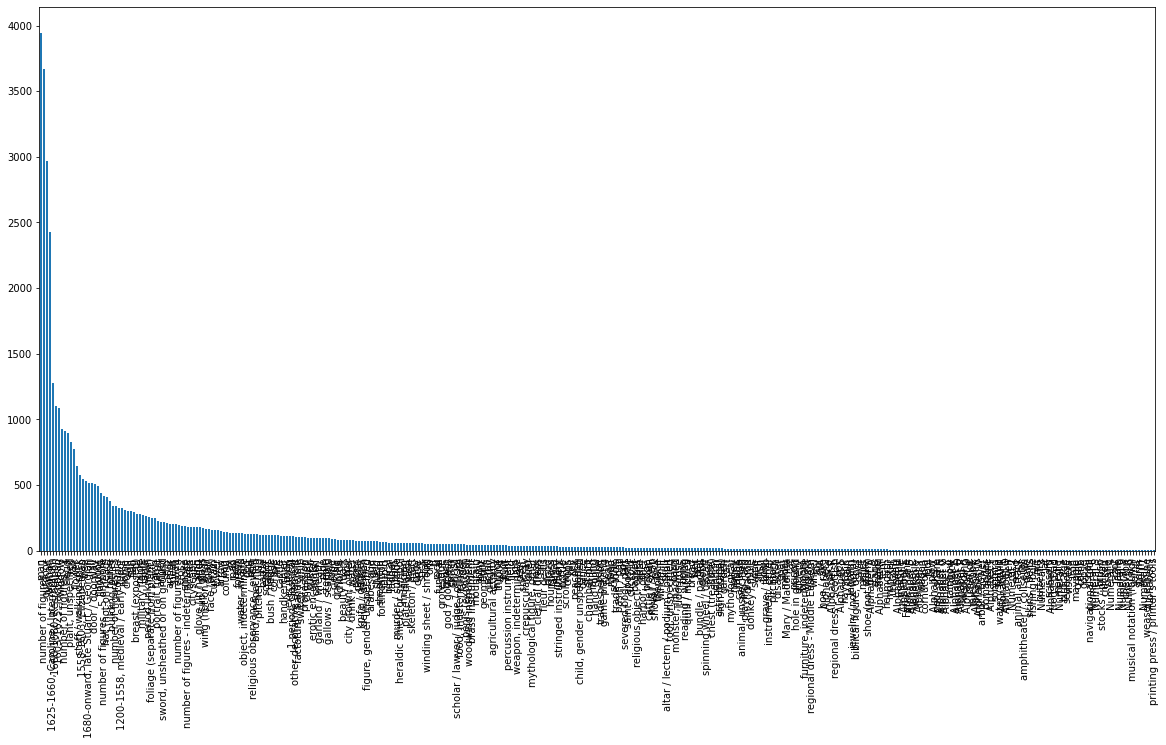

In [39]:
to_1D(df_enr['desc_tags']).value_counts().plot.bar(figsize = (20,10))